# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd 
import numpy as np 

In [4]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

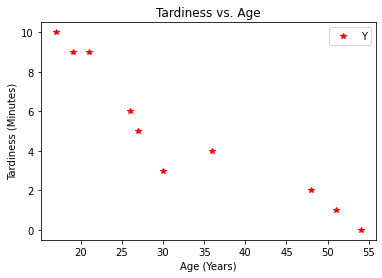

In [8]:
import matplotlib.pyplot as plt 
student_data.plot(x='X', y='Y',style='*', color ='r')
plt.title ('Tardiness vs. Age')
plt.xlabel('Age (Years)')
plt.ylabel('Tardiness (Minutes)')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

 <font color='pink'>
- From the  graph of the paired (x, y) sample data from above we may be able to see a negative correlation, i.e. Tradiness tends to decrease with age. . As x values increase, y values decrease.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

 <font color='pink'>
- Methodology:

- Correlation is defined as the statistical association between two variables. From the graph above we have already suggested that there is a negative correlation among the variables. 

- Since visual examinations are largely subjective. As Data Scientists, we resort to a more precise and objective measure to define the correlation between the two variables; this is the linear correlation coefficient, or Pearson’s product. This statistic numerically describes how strong the straight-line or linear relationship is between the two variables and the direction, positive or negative.

In [9]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


 <font color='pink'>
    From the data above it seems to be a negative values for “r”, this means there is a negative relationship, and from the value a stronng correlation as the value of "r" is close to negative one. 

In [10]:
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


 <font color='pink'>
Unlike the correlation coefficient, <br>
Positive covariance: Indicates that two variables tend to move in the same direction.<br>
Negative covariance: Reveals that two variables tend to move in inverse directions.<br>
The two variables, move iversively -45.56 year/minute  <br>

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

 <font color='pink'>
We know that the formula of a regression line is : y = mx + b. Where y is the predicted target , m is the slope of the line, and b is the y intercept.

If we plot the independent variable Age on the x-axis and dependent variable (Tardiness) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below: 


Plot your regression model on your scatter plot.

In [11]:
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

Slope -0.2428207709159808 R-Value -0.9391626886887121 PValue 5.56665383455343e-05


Text(0, 0.5, 'Tardiness (in Min)')

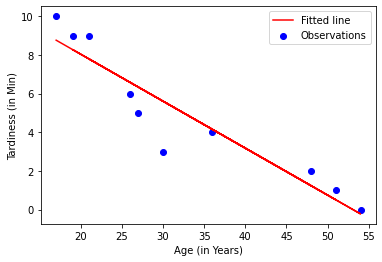

In [12]:
x = student_data ['X']
y = student_data ['Y']

#First obtain slope, intercept from linregress() to plot y' = intercept + slope * x
slope, intercept, r_value, p_value, stderr = linregress(x, y)
print("Slope",slope, "R-Value",r_value, "PValue",p_value)

# Plot data points
plt.scatter(x,y, color="blue", marker="o", label="Observations")
y_pred = intercept + slope*x
plt.plot(x,y_pred, color="red", label="Fitted line")
 
# Set labels
plt.legend(loc='best')
plt.xlabel('Age (in Years)') 
plt.ylabel('Tardiness (in Min)') 
 
# Save result in file
#plt.savefig("scipy-linregress.png")



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

 <font color='pink'>
Assuming that our entire population is the classroom,We can safely say that our model shows there is correlation between Tardiness and Age for the entire population that belongs to that classroom and can be predictor for tardiness for that coding bootcamp classroom. 

From the graph above it seems that the fitted line confirms that values tend to be around the line. However; in order to predict that age is a good predictor of tardiness, we would also need to look at the 
the p-value, which takes into account both the strength of the correlation 'r' as well as the number of samples. 

If the p-value value is under the significance level, we have to reject the null hypothesis, the null-hypothesis being here that there is no linear relationship between 2 variables (Age & Tardiness). It is tempting to think that when the correlation is close to -1 or +1, the association is strong whereas it is not when it is close to 0. However, this is not true because only the p-value confirms the fact that the correlation is statistically significant if the p-value is under the significance level. 

Or in your example with r=-0.93, p=5.56e-05 points towards the confirmation that the smaller the p-value, the stronger the evidence that one should reject the null hypothesis. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).

In this case I should reject the null hypothesis since there is less than 0.000056 probability that our null hypothesis is correct, therefore rejecting that there is no linear relatioship and asserting that there is a linear relationship ampng both variables. 

It is important to note that correlation does not denote causality. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
vehicles = pd.read_csv("../your-code/vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:

x= vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y= vehicles['CO2 Emission Grams/Mile']
CO2_correlation = pd.DataFrame(x.corrwith(y))
CO2_correlation

,0
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


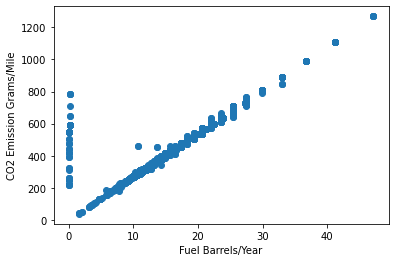

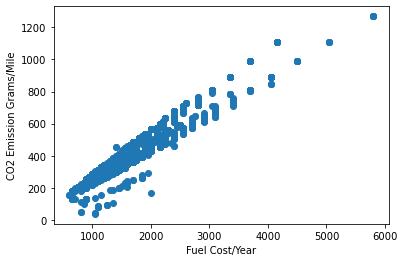

In [15]:
plt.scatter(vehicles['Fuel Barrels/Year'],vehicles['CO2 Emission Grams/Mile'])
plt.xlabel('Fuel Barrels/Year') 
plt.ylabel('CO2 Emission Grams/Mile') 
plt.show()

plt.scatter(vehicles['Fuel Cost/Year'],vehicles['CO2 Emission Grams/Mile'])
plt.xlabel('Fuel Cost/Year') 
plt.ylabel('CO2 Emission Grams/Mile') 
plt.show()

In [16]:
#First obtain slope, intercept from linregress() to plot y' = intercept + slope * x
linear_regression = linregress(x=vehicles['Fuel Cost/Year'],y=vehicles['CO2 Emission Grams/Mile'])
linear_regression

LinregressResult(slope=0.21861650771613905, intercept=61.563072413172165, rvalue=0.9308651512201842, pvalue=0.0, stderr=0.0004525548399302679)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Text(0, 0.5, 'CO2 Emission Grams/Mile')

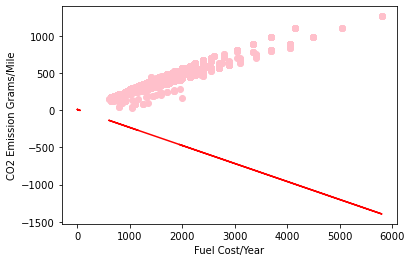

In [17]:
# Plot data points
reg_line = intercept + slope*x
plt.plot(x,reg_line, color="red", label="Fitted line")
plt.scatter(vehicles['Fuel Cost/Year'],vehicles['CO2 Emission Grams/Mile'], color="pink", marker="o", label="Observations")
 
# Set labels & size
plt.xlabel('Fuel Cost/Year') 
plt.ylabel('CO2 Emission Grams/Mile') 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
linear_regression

LinregressResult(slope=0.21861650771613905, intercept=61.563072413172165, rvalue=0.9308651512201842, pvalue=0.0, stderr=0.0004525548399302679)

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here.
df = pd.DataFrame({'x':[1,3,4,6,8,9,11,14],'y':[1,2,4,4,5,7,8,13]})
df.corr()

,x,y
x,1.00000,0.96523
y,0.96523,1.00000


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0, 0.5, 'Values of y')

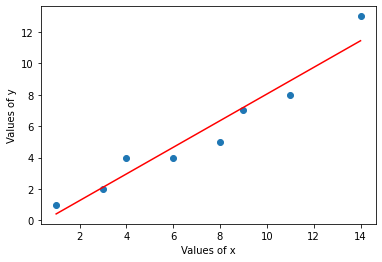

In [20]:
x=df['x']
y=df['y']

plt.scatter(x,y,marker ='o')
summary1 = linregress(x,y)
reg_line2 = summary1[0]*df['x'] +summary1[1] # I was doing same as abovce and did nnot work 
plt.plot(x,reg_line2, color="red")
plt.xlabel('Values of x') 
plt.ylabel('Values of y') 

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [21]:
summary1

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Text(0, 0.5, 'Values of y')

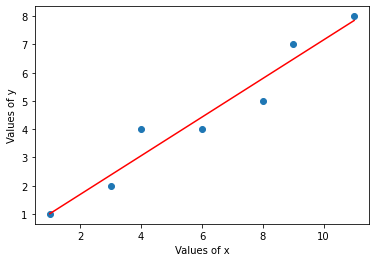

In [22]:
# Your response here. 
new_df = pd.DataFrame({'x':[1,3,4,6,8,9,11],'y':[1,2,4,4,5,7,8]})
new_df

x=new_df['x']
y=new_df['y']

plt.scatter(x,y,marker ='o')
summary2 = linregress(x,y)
reg_line3 = summary2[0]*new_df['x'] +summary2[1] # I was doing same as abovce and did nnot work 
plt.plot(x,reg_line3, color="red")
plt.xlabel('Values of x') 
plt.ylabel('Values of y')  

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [25]:
# Your response here. 
summary1

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

In [170]:
summary2

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)


 <font color='pink'>
    The value of P has improved, as the sample size has decreased and removed the outlier.